<a href="https://colab.research.google.com/github/apotnis07/Movie-Posters-Classification-into-Multiple-Genres/blob/main/Movie_Posters'_Classification_into_Multiple_Genres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.test.gpu_device_name())
from tensorflow.keras import Sequential

/device:GPU:0


In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [ ]:
print(tf.__version__)

2.4.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Total 7873 (delta 0), reused 0 (delta 0), pack-reused 7873
Receiving objects: 100% (7873/7873), 246.59 MiB | 44.42 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [ ]:
data = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')
data.shape

(7254, 27)

In [ ]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
print("0: ",data['Action'].isin([0]).sum(),"1:",data['Action'].isin([1]).sum())

0:  5911 1: 1343


In [ ]:
a=[]
a = data.columns[2:]
print(list(a))

['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']


In [ ]:
print(a[1])
print(len(a))

Adventure
25


{'Action': 1343, 'Adventure': 870, 'Animation': 244, 'Biography': 441, 'Comedy': 2900, 'Crime': 1176, 'Documentary': 652, 'Drama': 3619, 'Family': 434, 'Fantasy': 467, 'History': 224, 'Horror': 503, 'Music': 305, 'Musical': 97, 'Mystery': 454, 'N/A': 10, 'News': 21, 'Reality-TV': 2, 'Romance': 1334, 'Sci-Fi': 399, 'Short': 46, 'Sport': 221, 'Thriller': 918, 'War': 144, 'Western': 50}
[1343, 870, 244, 441, 2900, 1176, 652, 3619, 434, 467, 224, 503, 305, 97, 454, 10, 21, 2, 1334, 399, 46, 221, 918, 144, 50]


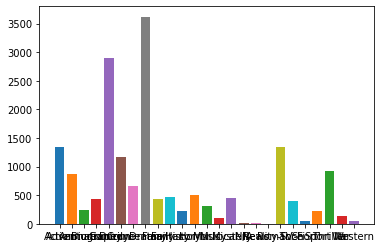

In [ ]:

zero=[]
one=[]
Dict={}
for i in range(0, 25):
  x = a[i]
  # Dict[x] = {'0':data[x].isin([0]).sum(), '1':data[x].isin([1]).sum()}
  Dict[x] = data[x].isin([1]).sum()

  zero.append(data[x].isin([0]).sum())
  one.append(data[x].isin([1]).sum())
print(Dict)
print(one)

for i in range(0,25):
  x = a[i]
  y = Dict[x]
  # if one[i]<434:
  #   plt.scatter(one[i],zero[i], color='blue')
  #   # print(a[i])
  # elif one[i]>2899:
  #   plt.scatter(one[i],zero[i], color='blue')
  #   print(a[i])
  # else:
  #   plt.scatter(one[i],zero[i], color='red')
  plt.bar(a[i],one[i])
  # plt.scatter(a[i],one[i])
plt.show()

[1343, 870, 244, 441, 2900, 1176, 652, 3619, 434, 467, 224, 503, 305, 97, 454, 10, 21, 2, 1334, 399, 46, 221, 918, 144, 50]
[{'0': 5911, '1': 1343}, {'0': 6384, '1': 870}, {'0': 7010, '1': 244}, {'0': 6813, '1': 441}, {'0': 4354, '1': 2900}, {'0': 6078, '1': 1176}, {'0': 6602, '1': 652}, {'0': 3635, '1': 3619}, {'0': 6820, '1': 434}, {'0': 6787, '1': 467}, {'0': 7030, '1': 224}, {'0': 6751, '1': 503}, {'0': 6949, '1': 305}, {'0': 7157, '1': 97}, {'0': 6800, '1': 454}, {'0': 7244, '1': 10}, {'0': 7233, '1': 21}, {'0': 7252, '1': 2}, {'0': 5920, '1': 1334}, {'0': 6855, '1': 399}, {'0': 7208, '1': 46}, {'0': 7033, '1': 221}, {'0': 6336, '1': 918}, {'0': 7110, '1': 144}, {'0': 7204, '1': 50}]
Comedy
Drama


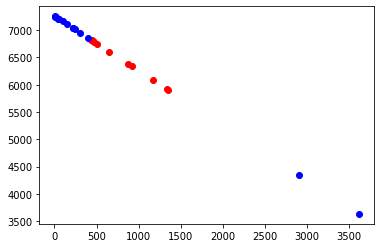

In [ ]:
zero=[]
one=[]
Dict={}
Dict1={}
for i in range(0, 25):
  x = a[i]
  # print("x=", x," 0:",data[x].isin([0]).sum()," 1:",data[x].isin([1]).sum())
  # print("x=", x," 1:",data[x].isin([1]).sum())
  # Dict1[0] = data[x].isin([0]).sum()
  # Dict1[1] = data[x].isin([1]).sum()
  # Dict[x] = data[x].isin([1]).sum()

  # Dict[x] = {data[x], '1':data[x].isin([1]).sum()}
  Dict[x] = {'0':data[x].isin([0]).sum(), '1':data[x].isin([1]).sum()}


  zero.append(data[x].isin([0]).sum())
  one.append(data[x].isin([1]).sum())
# print(Dict)
# print(zero)
print(one)
y=[]
# 6820 and 434 are medians
for i in range(0,25):
   x = a[i]
   y.append(Dict[x])
print(y)


for i in range(0,25):
  # print(zero[i],one[i])
  x = a[i]
  y = Dict[x]
  if one[i]<434:
    plt.scatter(one[i],zero[i], color='blue')
    # print(a[i])
  elif one[i]>2899:
    plt.scatter(one[i],zero[i], color='blue')
    print(a[i])

  else:
    plt.scatter(one[i],zero[i], color='red')
plt.show()

Drama and comedy are the points to the bottom right

In [ ]:
data["Action"]

0       0
1       0
2       0
3       0
4       1
       ..
7249    1
7250    0
7251    0
7252    0
7253    0
Name: Action, Length: 7254, dtype: int64

In [ ]:
print(data.loc[:])

             Id                                Genre  ...  War  Western
0     tt0086425                  ['Comedy', 'Drama']  ...    0        0
1     tt0085549        ['Drama', 'Romance', 'Music']  ...    0        0
2     tt0086465                           ['Comedy']  ...    0        0
3     tt0086567               ['Sci-Fi', 'Thriller']  ...    0        0
4     tt0086034  ['Action', 'Adventure', 'Thriller']  ...    0        0
...         ...                                  ...  ...  ...      ...
7249  tt2409818      ['Action', 'Crime', 'Thriller']  ...    0        0
7250  tt2062622    ['Animation', 'Comedy', 'Family']  ...    0        0
7251  tt2442502                           ['Comedy']  ...    0        0
7252  tt3455850                      ['Documentary']  ...    0        0
7253  tt4179482                        ['Animation']  ...    0        0

[7254 rows x 27 columns]


In [ ]:
print(data.loc[:,'Action':'Adventure'])

      Action  Adventure
0          0          0
1          0          0
2          0          0
3          0          0
4          1          1
...      ...        ...
7249       1          0
7250       0          0
7251       0          0
7252       0          0
7253       0          0

[7254 rows x 2 columns]


In [ ]:
img_width = 180
img_height = 180

X=[]

for i in tqdm(range(data.shape[0])):
  path = '/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 7254/7254 [00:17<00:00, 414.01it/s]


In [ ]:
X.shape

(7254, 180, 180, 3)

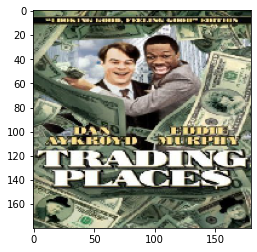

In [ ]:
plt.imshow(X[2])

In [ ]:
data['Genre'][2]

"['Comedy']"

In [ ]:
y = data.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)

In [ ]:
X_train.shape

(6165, 180, 180, 3)

In [ ]:
X_train[0].shape

(180, 180, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 178, 178, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 89, 89, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 87, 87, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 32)        0

In [ ]:
X_test.shape

(1089, 180, 180, 3)

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
193/193 [==============================] - 40s 34ms/step - loss: 0.8408 - accuracy: 0.0776 - val_loss: 0.3999 - val_accuracy: 0.1304
Epoch 2/5
193/193 [==============================] - 6s 30ms/step - loss: 0.3569 - accuracy: 0.2263 - val_loss: 0.2840 - val_accuracy: 0.1901
Epoch 3/5
193/193 [==============================] - 6s 30ms/step - loss: 0.2658 - accuracy: 0.2957 - val_loss: 0.3081 - val_accuracy: 0.2645
Epoch 4/5
193/193 [==============================] - 6s 29ms/step - loss: 0.2511 - accuracy: 0.3124 - val_loss: 0.2864 - val_accuracy: 0.2323
Epoch 5/5
193/193 [==============================] - 6s 30ms/step - loss: 0.2473 - accuracy: 0.3033 - val_loss: 0.2906 - val_accuracy: 0.2700


[ 7  4 18  0  1  6 22  5  3 14 19 11  9 10  8 21 12 23  2 13 20 16 24 15
 17]
[ 7  4 18]
Drama
Comedy
Romance
Drama


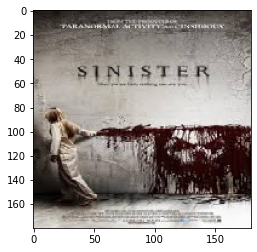

In [ ]:
img = image.load_img('/content/Movies-Poster_Dataset/sinister.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]

y_prob = model.predict(img)
print(np.argsort(y_prob[0])[::-1])
top3 = np.argsort(y_prob[0])[:-4:-1]
print(top3)
for i in range(3):
  print(classes[top3[i]])
print(classes[np.argmax(y_prob)])

Drama
Comedy
Romance


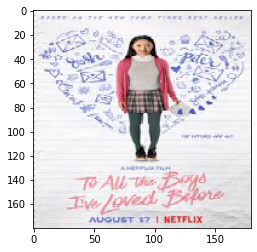

In [ ]:
img = image.load_img('/content/boys.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]

y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])


In [ ]:
img = image.load_img('/content/hitman.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]

y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])


FileNotFoundError: ignored

Drama
Crime
Romance


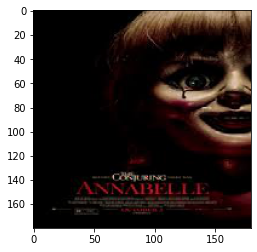

In [ ]:
img = image.load_img('/content/anna.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]

y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
tf.keras.models.save_model(model,'my_model2.hdf5')

In [ ]:
!pip install streamlit

     |████████████████████████████████| 8.2MB 25.5MB/s 
     |████████████████████████████████| 112kB 55.0MB/s 
     |████████████████████████████████| 81kB 9.9MB/s 
     |████████████████████████████████| 92kB 12.5MB/s 
     |████████████████████████████████| 174kB 58.4MB/s 
     |████████████████████████████████| 4.2MB 50.6MB/s 
     |████████████████████████████████| 71kB 10.9MB/s 
     |████████████████████████████████| 122kB 59.3MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp37-none-any.whl size=13448 sha256=229a667620bd6d050771e4f96f2371e5542a95755226c0bbb2a826d9a92baee3
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
Successfully built blinker
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.
  Found existing installation: click 8.0.0
    Uninstalling click-8.0.0:
      Successfully uninstalled click-8.0.0
  Found existing installation: ipykernel 

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image
import requests
from io import BytesIO

st.set_option('deprecation.showfileUploaderEncoding',False)
st.title('Movie poster genre classification')
st.text('Provide URL of movie poster')

@st.cache(allow_output_mutation=True)
def load_model():
  model = tf.keras.models.load_model('/content/my_model2.hdf5')
  return model

with st.spinner('Loading model into memory...'):
  model = load_model()

classes = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']

def scale(image):
  image = tf.cast(image, tf.float32)
  image /= 255.0

  return tf.image.resize(image, [180,180])

def decode_img(image):
  img = tf.image.decode_jpeg(image, channels=3)
  img = scale(img)
  return np.expand_dims(img, axis=0)


path = st.text_input('Enter Image URL to classify.. ','https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcQOlW5oFheta_jLvWYr__R8d1D7UqR3Vy8uhC2QzcZU7s9K4wdc')
if path is not None:
  content = requests.get(path).content

  st.write("Predicted Class:")
  with st.spinner('Classifying...'):
    label = np.argmax(model.predict(decode_img(content)),axis=1)
    st.write(classes[label[0]])
  st.write("")
  image = Image.open(BytesIO(content))
  st.image(image, caption='Classifying Movie poster', use_column_width=True)

Overwriting app.py


In [ ]:
%%writefile app.py

# Test ////////////////////
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image
import requests
from io import BytesIO

st.set_option('deprecation.showfileUploaderEncoding',False)
st.title('Movie poster genre classification')
st.text('Provide URL of movie poster')

@st.cache(allow_output_mutation=True)
def load_model():
  model = tf.keras.models.load_model('/content/my_model2.hdf5')
  return model

with st.spinner('Loading model into memory...'):
  model = load_model()

classes = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']

def scale(image):
  image = tf.cast(image, tf.float32)
  image /= 255.0

  return tf.image.resize(image, [180,180])

def decode_img(image):
  img = tf.image.decode_jpeg(image, channels=3)
  img = scale(img)
  return np.expand_dims(img, axis=0)


path = st.text_input('Enter Image URL to classify.. ','https://encrypted-tbn3.gstatic.com/images?q=tbn:ANd9GcQOlW5oFheta_jLvWYr__R8d1D7UqR3Vy8uhC2QzcZU7s9K4wdc')
if path is not None:
  content = requests.get(path).content

  st.write("Predicted Class:")
  with st.spinner('Classifying...'):
    label = np.argsort(model.predict(decode_img(content)),axis=1)
    label1 = label[-3:]
    # st.write(label)
    # st.write(label1[0][-1])
    x = label1[0][-1]
    g1 = classes[x]
    st.write(g1)
    y = label1[0][-2]
    g2 = classes[y]
    st.write(g2)
    z = label1[0][-3]
    g3 = classes[z]
    st.write(g3)
    # st.write(classes(label1[0][-2]))
    # st.write(classes(label1[0][-3]))


    # st.write(classes[label[0]])
    # st.write(classes[label[1]])
  st.write("")
  image = Image.open(BytesIO(content))
  st.image(image, caption='Classifying Movie poster', use_column_width=True)

Overwriting app.py


In [ ]:
!pip install pyngrok

In [ ]:
!ngrok authtoken 1shPGYTOd0lCHlY4gJDQiXmYTYr_2eQUWpWuR9anemf56H2K

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port='80')
url


<NgrokTunnel: "http://19cc61098e38.ngrok.io" -> "http://localhost:80">

In [ ]:
!streamlit run --server.port 80 app.py >/dev/null

2021-05-18 16:37:31.844 An update to the [server] config option section was detected. To have these changes be reflected, please restart streamlit.
2021-05-18 16:37:32.311674: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-18 16:37:34.674513: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-18 16:37:34.675617: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-18 16:37:34.684097: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-18 16:37:34.684893: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
st.set_option('deprecation.showfileUploaderEncoding',False)
@st.cache(allow_output_mutation=True)
def load_model():
  model = tf.keras.models.load_model('/content/my_model2.hdf5')
  return model

model = load_model()
st.write("""
          # Movie genre classification
          """
          )

file = st.file_uploader("Please upload a movie poster",type=['jpg','png'])
import cv2
from PIL import Image, ImageOps
import numpy as np
def import_and_predict(image_data, model):

  size=(180,180)
  image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
  img = np.asarray(image)
  img_reshape = img[np.newaxis,...]
  prediction = model.predict(img_reshape)
  return prediction

if file is None:
  st.text("Please upload an image")

else:
  image = Image.open(file)
  st.image(image, use_column_width=True)
  predictions = import_and_predict(image, model)
  class_names=['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']
  # top3 = np.argsort(predictions)[:-4:-1]
  # a = []
  # for i in range(3):
  #   a.append(class_names[np.argsort(predictions)[:-4:-1]])


#   y_prob = model.predict(img)
# top3 = np.argsort(y_prob[0])[:-4:-1]

# for i in range(3):
#   print(classes[top3[i]])
#   predictions=predictions[::-1]
  a = []
  top3 = np.argsort(predictions)[::-1]
  st.success(top3)
  # for i in range(3):
  #   a.append(class_names[top3[i]])
  # st.success(a[0])
  # st.success(a[1])
  # st.success(a[2])

  string = "This image most likely is: "+ class_names[np.argmax(predictions)]
  st.success(string)


Overwriting app.py


In [ ]:
!killall ngrok

In [ ]:
!pgrep streamlit

751
906
979
1057
1171
1329
1466
1568
1662
1905
2038
2137
2292
2384
2483
2817
2969
3052


In [ ]:
!kill 1568

In [ ]:
!kill 906

In [ ]:
!cat /content/nohup.out

In [ ]:
!streamlit hello


  Welcome to Streamlit. Check out our demo in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.186.172.229:8501

  Ready to create your own Python apps super quickly?
  Head over to https://docs.streamlit.io

  May you create awesome apps!


  Stopping...


In [ ]:
!streamlit run app.py &

2021-05-18 10:44:49.379356: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
  Stopping...

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8502
  External URL: http://35.186.172.229:8502



In [ ]:
!streamlit config show

# Below are all the sections and options you can have in ~/.streamlit/config.toml.

[global]

# By default, Streamlit checks if the Python watchdog module is available and, if not, prints a warning asking for you to install it. The watchdog module is not required, but highly recommended. It improves Streamlit's ability to detect changes to files in your filesystem.
# If you'd like to turn off this warning, set this to True.
# Default: false
disableWatchdogWarning = false

# If True, will show a warning when you run a Streamlit-enabled script via "python my_script.py".
# Default: true
showWarningOnDirectExecution = true


[logger]

# Level of logging: 'error', 'warning', 'info', or 'debug'.
# Default: 'info'
level = "info"

# String format for logging messages. If logger.datetimeFormat is set, logger messages will default to `%(asctime)s.%(msecs)03d %(message)s`. See [Python's documentation](https://docs.python.org/2.6/library/logging.html#formatter-objects) for available attributes.
# 

In [ ]:
!ssh -o logLevel=ERROR -L 8501:$IP_ADDRESS:8501 $USERNAME@$IP_ADDRESS

usage: ssh [-46AaCfGgKkMNnqsTtVvXxYy] [-b bind_address] [-c cipher_spec]
           [-D [bind_address:]port] [-E log_file] [-e escape_char]
           [-F configfile] [-I pkcs11] [-i identity_file]
           [-J [user@]host[:port]] [-L address] [-l login_name] [-m mac_spec]
           [-O ctl_cmd] [-o option] [-p port] [-Q query_option] [-R address]
           [-S ctl_path] [-W host:port] [-w local_tun[:remote_tun]]
           [user@]hostname [command]


In [ ]:
img = image.load_img('/content/Movies-Poster_Dataset/hitman.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]

y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

NameError: ignored

In [ ]:
img = image.load_img('/content/Movies-Poster_Dataset/insidious.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]

y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-5:-1]

for i in range(4):
  print(classes[top3[i]])

In [ ]:
img = image.load_img('/content/Movies-Poster_Dataset/anna.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]

y_prob = model.predict(img)

top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

In [ ]:
img = image.load_img('/content/Movies-Poster_Dataset/heist1.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]

y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

In [ ]:
# import random
# %matplotlib inline

# y_values = [list1 for _ in range(25)]
# unique, counts = np.unique(y_values,return_counts=True)
# print(y_values)

In [ ]:
X_train.shape
y_train.shape

In [ ]:
X_train[0].shape

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation="relu", input_shape = X_train[0].shape ))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25, activation='sigmoid'))



In [ ]:
model.summary()
print(len(model.layers))

In [ ]:
model.compile(optimizer="adam", loss = "binary_crossentropy", metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

In [ ]:
img = image.load_img('/content/Movies-Poster_Dataset/endgame.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]

y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

In [ ]:
ls

sample_data/


In [ ]:
cd MyDrive

[Errno 2] No such file or directory: 'MyDrive'
/content


In [ ]:
cd drive

[Errno 2] No such file or directory: 'drive'
/content
